In [33]:
# Import libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean, nice plots
sns.set(style='whitegrid')
%matplotlib inline


In [34]:
# Load cleaned datasets from the processed folder
patients = pd.read_csv('../data/processed/patients_clean.csv')
subscribers = pd.read_csv('../data/processed/subscribers_clean.csv')
claims = pd.read_csv('../data/processed/claims_clean.csv')
diseases = pd.read_csv('../data/processed/diseases_clean.csv')
groups = pd.read_csv('../data/processed/groups_clean.csv')
subgroups = pd.read_csv('../data/processed/subgroups_clean.csv')


In [35]:
# Show number of rows and columns in each dataset
datasets = {
    "Patients": patients,
    "Subscribers": subscribers,
    "Claims": claims,
    "Diseases": diseases,
    "Groups": groups,
    "Subgroups": subgroups
}

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} rows × {df.shape[1]} columns")
    claims.columns


Patients: 70 rows × 8 columns
Subscribers: 100 rows × 14 columns
Claims: 70 rows × 8 columns
Diseases: 59 rows × 3 columns
Groups: 57 rows × 8 columns
Subgroups: 9 rows × 4 columns


In [36]:
# Show the first few rows of patient data
patients.head()


,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id
0,187158,Harbir,Female,1924-06-30,+91 0112009318,Galactosemia,Rourkela,H1001
1,112766,Brahmdev,Female,1948-12-20,+91 1727749552,Bladder cancer,Tiruvottiyur,H1016
2,199252,Ujjawal,Male,1980-04-16,+91 8547451606,Kidney cancer,Berhampur,H1009
3,133424,Ballari,Female,1969-09-25,+91 0106026841,Suicide,Bihar Sharif,H1017
4,172579,Devnath,Female,1946-05-01,+91 1868774631,Food allergy,Bidhannagar,H1019


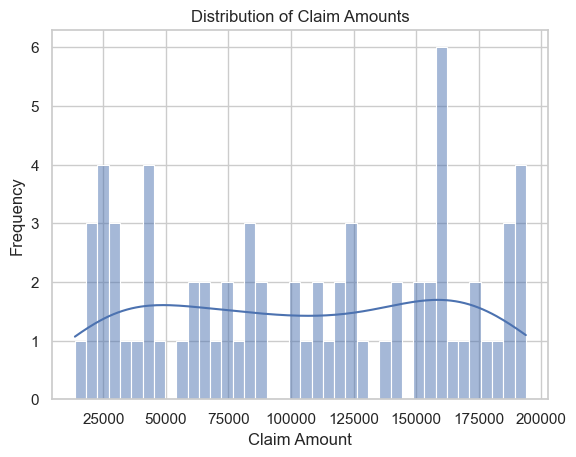

In [37]:
if 'claim_amount' in claims.columns:
    sns.histplot(claims['claim_amount'], bins=40, kde=True)
    plt.title("Distribution of Claim Amounts")
    plt.xlabel("Claim Amount")
    plt.ylabel("Frequency")
    plt.show()


In [38]:
# Top 10 diseases
if 'disease_name' in diseases.columns:
    top_diseases = diseases['disease_name'].value_counts().head(10)
    sns.barplot(x=top_diseases.values, y=top_diseases.index)
    plt.title("Top 10 Reported Diseases")
    plt.xlabel("Frequency")
    plt.ylabel("Disease")
    plt.show()


In [39]:
# Top 10 hospitals by number of claims
if 'hospital_id' in claims.columns:
    top_hospitals = claims['hospital_id'].value_counts().head(10)
    sns.barplot(x=top_hospitals.values, y=top_hospitals.index)
    plt.title("Top 10 Hospitals by Number of Claims")
    plt.xlabel("Number of Claims")
    plt.ylabel("Hospital ID")
    plt.show()


In [40]:
# Make sure claim_amount and hospital_id exist
if 'hospital_id' in claims.columns and 'claim_amount' in claims.columns:
    avg_claims = claims.groupby('hospital_id')['claim_amount'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=avg_claims.values, y=avg_claims.index)
    plt.title("Top 10 Hospitals by Average Claim Amount")
    plt.xlabel("Average Claim Amount")
    plt.ylabel("Hospital ID")
    plt.show()


In [41]:
# Top diseases by frequency
if 'disease_name' in diseases.columns:
    top_diseases = diseases['disease_name'].value_counts().head(10)
    sns.barplot(x=top_diseases.values, y=top_diseases.index)
    plt.title("Top 10 Diseases Reported")
    plt.xlabel("Frequency")
    plt.ylabel("Disease Name")
    plt.show()


In [42]:
# Merge patients and claims by patient ID (adjust if different column names)
if 'patient_id' in patients.columns and 'patient_id' in claims.columns:
    merged = pd.merge(claims, patients, on='patient_id', how='inner')
    if 'age' in merged.columns and 'claim_amount' in merged.columns:
        sns.scatterplot(data=merged, x='age', y='claim_amount')
        plt.title("Claim Amount vs Age")
        plt.xlabel("Age")
        plt.ylabel("Claim Amount")
        plt.show()


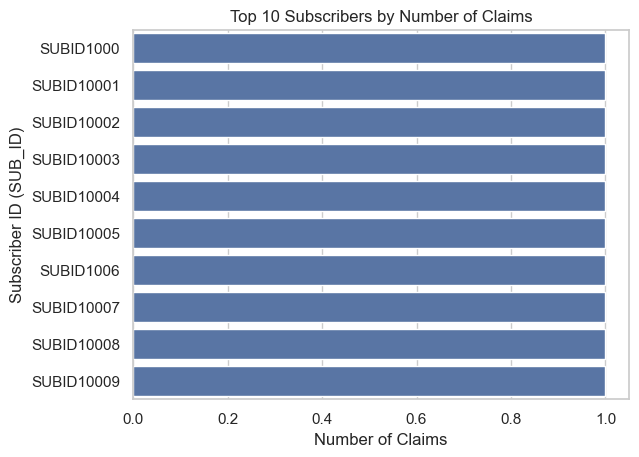

In [43]:
# Corrected: use SUB_ID for subscriber
top_subscribers = claims['SUB_ID'].value_counts().head(10)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_subscribers.values, y=top_subscribers.index)
plt.title("Top 10 Subscribers by Number of Claims")
plt.xlabel("Number of Claims")
plt.ylabel("Subscriber ID (SUB_ID)")
plt.show()


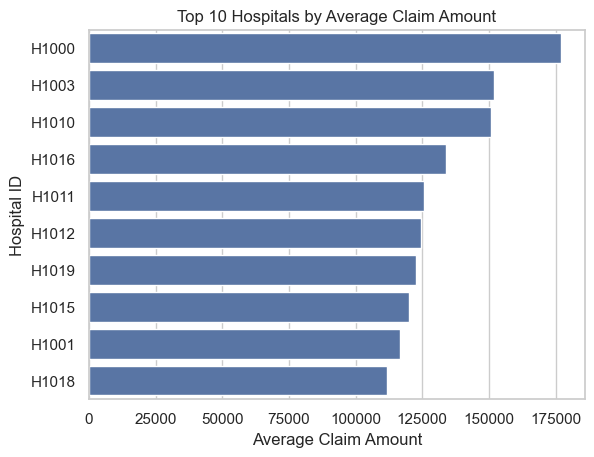

In [44]:
# Merge claims with patients to connect to hospitals
merged = claims.merge(patients, left_on='patient_id', right_on='Patient_id')

# Group by hospital and calculate average claim amount
avg_claims_per_hospital = merged.groupby('hospital_id')['claim_amount'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_claims_per_hospital.values, y=avg_claims_per_hospital.index)
plt.title("Top 10 Hospitals by Average Claim Amount")
plt.xlabel("Average Claim Amount")
plt.ylabel("Hospital ID")
plt.show()


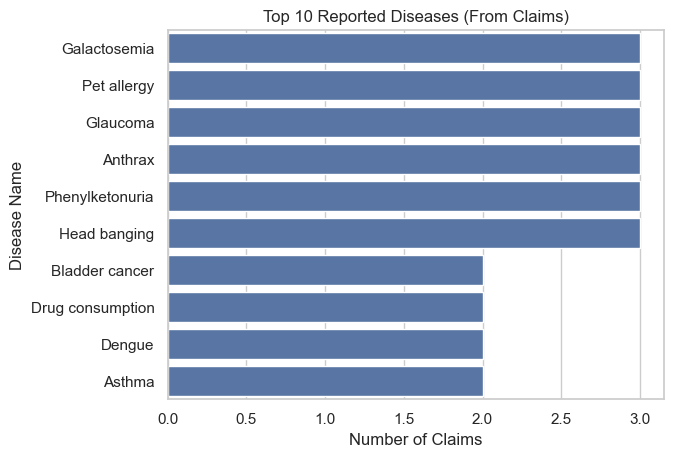

In [45]:
# Top 10 diseases from claims dataset
top_diseases = claims['disease_name'].value_counts().head(10)

sns.barplot(x=top_diseases.values, y=top_diseases.index)
plt.title("Top 10 Reported Diseases (From Claims)")
plt.xlabel("Number of Claims")
plt.ylabel("Disease Name")
plt.show()


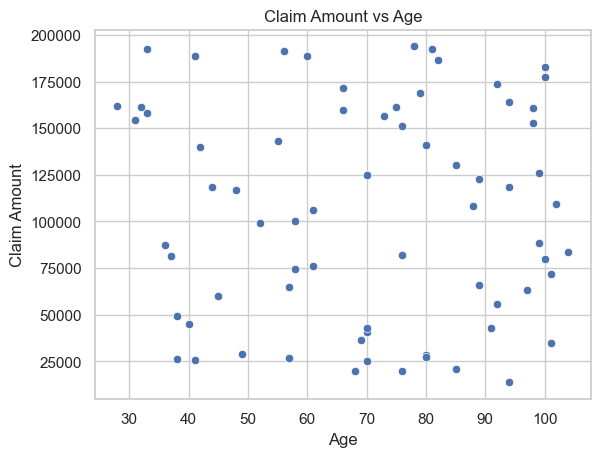

In [46]:
# First, convert birth date to datetime
patients['patient_birth_date'] = pd.to_datetime(patients['patient_birth_date'], errors='coerce')

# Calculate AGE
patients['age'] = (pd.Timestamp.now() - patients['patient_birth_date']).dt.days // 365

# Merge again
merged = claims.merge(patients, left_on='patient_id', right_on='Patient_id')

# Scatter plot
sns.scatterplot(data=merged, x='age', y='claim_amount')
plt.title("Claim Amount vs Age")
plt.xlabel("Age")
plt.ylabel("Claim Amount")
plt.show()


In [47]:
# Show hospitals with the highest average claim amounts
try:
    avg_claims = claims.groupby('hospital_id')['claim_amount'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=avg_claims.values, y=avg_claims.index)
    plt.title("Top 10 Hospitals by Average Claim Amount")
    plt.xlabel("Average Claim Amount")
    plt.ylabel("Hospital ID")
    plt.show()
except KeyError as e:
    print(f"⚠️ Column missing: {e}")


⚠️ Column missing: 'hospital_id'


In [48]:
# Show the 10 most frequently recorded diseases
try:
    top_diseases = diseases['disease_name'].value_counts().head(10)
    sns.barplot(x=top_diseases.values, y=top_diseases.index)
    plt.title("Top 10 Diseases Reported")
    plt.xlabel("Frequency")
    plt.ylabel("Disease Name")
    plt.show()
except KeyError:
    print("⚠️ Column 'disease_name' not found in diseases dataset.")


⚠️ Column 'disease_name' not found in diseases dataset.


In [49]:
# Scatter plot to explore if claim amount increases with age
try:
    merged = pd.merge(claims, patients, on='patient_id', how='inner')
    sns.scatterplot(data=merged, x='age', y='claim_amount')
    plt.title("Claim Amount vs Age")
    plt.xlabel("Age")
    plt.ylabel("Claim Amount")
    plt.show()
except KeyError as e:
    print(f"⚠️ Column missing during merge or plotting: {e}")


⚠️ Column missing during merge or plotting: 'patient_id'


In [50]:
# Check columns in claims
claims.columns


Index(['claim_id', 'patient_id', 'disease_name', 'SUB_ID', 'Claim_Or_Rejected',
       'claim_type', 'claim_amount', 'claim_date'],
      dtype='object')

In [51]:
# Check columns in diseases
diseases.columns


Index(['S101', '110001', 'Beriberi'], dtype='object')

In [52]:
# Check columns in patients
patients.columns


Index(['Patient_id', 'Patient_name', 'patient_gender', 'patient_birth_date',
       'patient_phone', 'disease_name', 'city', 'hospital_id', 'age'],
      dtype='object')